Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos. Para isso, você dispõe desse [dataset](https://cdn3.gnarususercontent.com.br/3677-data-science-regressao-linear/Projeto/Base%20de%20dados/hoteis.csv).

Nesta atividade, sua tarefa envolve conduzir as seguintes etapas:

    análise inicial com o PairPlot da Seaborn;
    construir modelos de regressão linear; e
    realizar a comparação desses modelos.

Dedique-se às atividades e desenvolva as suas habilidades por meio da aplicação do seu conhecimento adquirido ao longo do curso.


In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
dados = pd.read_csv('hoteis.csv')
dados.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


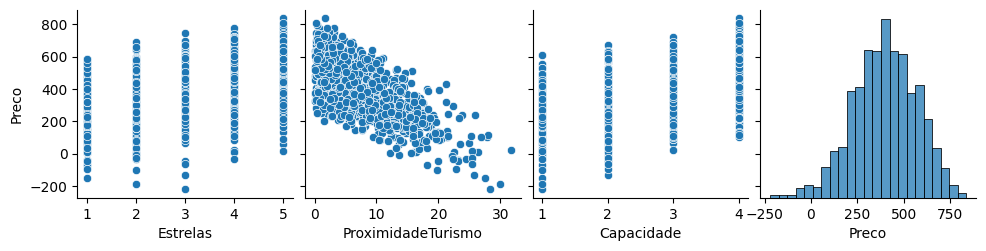

In [10]:
sns.pairplot(dados,y_vars='Preco')

In [13]:
y = dados['Preco']
X = dados.drop(columns = 'Preco')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
df_train = pd.DataFrame(data=X_train)
df_train['Preco'] = y_train

In [23]:
modelo1 = ols('Preco ~ Estrelas', data = df_train).fit()

In [25]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.54e-31
Time:                        16:29:19   Log-Likelihood:                -4528.1
No. Observations:                 700   AIC:                             9060.
Df Residuals:                     698   BIC:                             9069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.0978     13.772     17.434      0.0

In [30]:
X_train = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, X_train[['const','Estrelas', 'ProximidadeTurismo']]).fit()
modelo3 = sm.OLS(y_train, X_train[['const','Estrelas', 'Capacidade']]).fit()
modelo4 = sm.OLS(y_train, X_train[['const','Capacidade', 'ProximidadeTurismo']]).fit()
modelo5 = sm.OLS(y_train, X_train[['const','Estrelas', 'ProximidadeTurismo','Capacidade']]).fit()

In [31]:
print("Modelo 1: ", modelo1.rsquared)
print("Modelo 2: ", modelo2.rsquared)
print("Modelo 3: ", modelo3.rsquared)
print("Modelo 4: ", modelo4.rsquared)
print("Modelo 5: ", modelo5.rsquared)

Modelo 1:  0.17775997575293379
Modelo 2:  0.6542080651896893
Modelo 3:  0.4642000323891067
Modelo 4:  0.7532991269421774
Modelo 5:  0.9232625292194134


In [34]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     659.3
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          1.89e-161
Time:                        16:36:16   Log-Likelihood:                -4224.9
No. Observations:                 700   AIC:                             8456.
Df Residuals:                     697   BIC:                             8470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                409.1861     10

In [36]:
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     301.9
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           3.61e-95
Time:                        16:36:26   Log-Likelihood:                -4378.2
No. Observations:                 700   AIC:                             8762.
Df Residuals:                     697   BIC:                             8776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9346     15.970      1.186      0.2

In [37]:
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1064.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          1.48e-212
Time:                        16:36:40   Log-Likelihood:                -4106.8
No. Observations:                 700   AIC:                             8220.
Df Residuals:                     697   BIC:                             8233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                353.6340      9

In [38]:
print(modelo5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2791.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:36:55   Log-Likelihood:                -3698.0
No. Observations:                 700   AIC:                             7404.
Df Residuals:                     696   BIC:                             7422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                191.7119      6